# Influence-weighted analysis of similarities between network motifs

TODO:

1. load motifs + influence data.
2. filter motifs by influence score???
3. filter motifs by information content???

Strategy for how to compare different motif sets between cell types/algorithm types:
- use the same method as before?

1. Similarity among motifs with only in the top 10% of influence, do a pairwise mutual entropy comparison.
2. 

In [8]:
%matplotlib inline
import sys
import os
import cPickle

sys.path.append(os.path.abspath('../src/'))
import nn_utils
import draw_logo
reload(draw_logo)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import matplotlib
import matplotlib.patheffects

In [33]:
path = '../data/2017-04-14-models/'
cell_types = ['HEPG2', 'MCF7', 'CHO', 'HELA', 'LNCAP', 'HEK']
motifs = {}
influences = {}
info = {}
for c in cell_types:
    motifs[c] = np.load(os.path.join(path, c + '-filters.npy'))
    influences[c] = np.load(os.path.join(path, c+'-influence.npy'))
    info[c] = draw_logo.all_info_content(motifs[c])

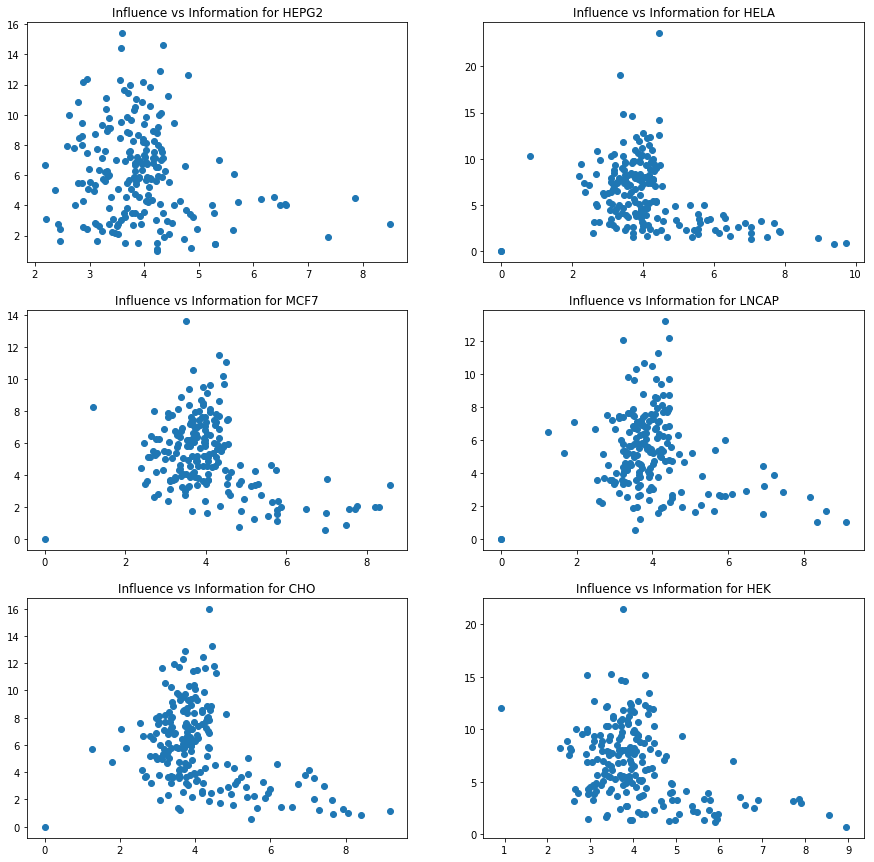

In [30]:
figs, axes = plt.subplots(3, 2, figsize=(15, 15))
for i, c in enumerate(cell_types):
    axes[i%3, i/3].scatter(info[c], influences[c])
    axes[i%3, i/3].set_title('Influence vs Information for {0}'.format(c))

In [88]:
path = '../data/2017-04-15-models/'
cell_types = ['HEPG2', 'MCF7', 'CHO', 'HELA', 'LNCAP', 'HEK']
motifs2 = {}
influences2 = {}
info2 = {}
for c in cell_types:
    motifs2[c] = np.load(os.path.join(path, c + '-filters.npy'))
    info2[c] = draw_logo.all_info_content(motifs[c])

[<Container object of 6 artists>,
 <Container object of 6 artists>,
 <Container object of 6 artists>,
 <Container object of 6 artists>]

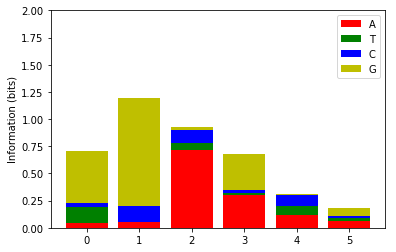

In [43]:
draw_logo.draw_logo(motifs['HEK'][118])

(<matplotlib.figure.Figure at 0x7fab38785f10>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fab384df3d0>)

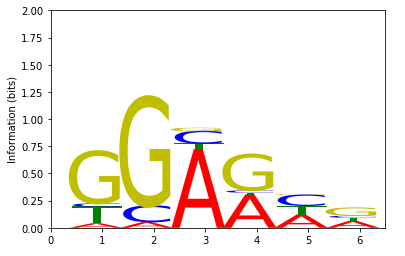

In [44]:
draw_logo.draw_logo_2(motifs['HEK'][118])

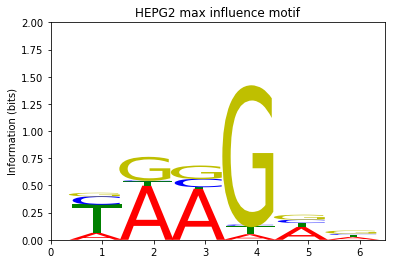

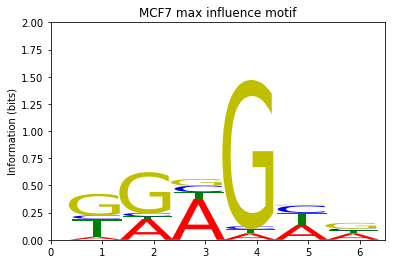

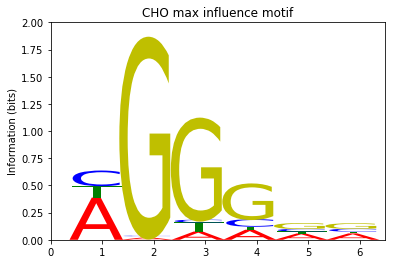

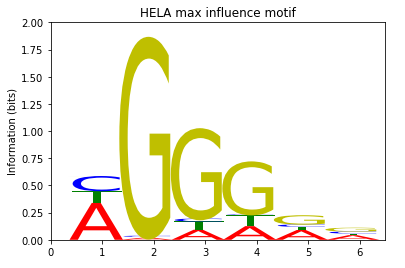

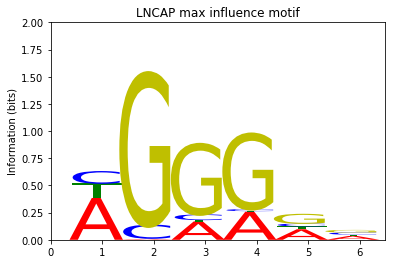

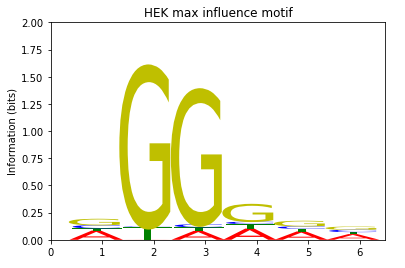

In [62]:
# comparing motifs...???
for c in cell_types:
    indices = np.argsort(influences[c])
    max_influences = indices[-1:]
    max_influence_motifs = motifs[c][max_influences,:,:]
    draw_logo.draw_logo_2(max_influence_motifs[0])
    plt.title(c + ' max influence motif')
    plt.figure()

In [69]:
# motif comparisons across all motifs
matches = {}
for c1 in cell_types:
    for c2 in cell_types:
        if c1!=c2:
            matches[c1,c2] = draw_logo.motif_set_matches(motifs[c1], motifs[c2])

In [70]:
distances = {}
for c1 in cell_types:
    for c2 in cell_types:
        if c1!=c2:
            match = matches[c1,c2]
            print c1, c2, np.mean([m[2] for m in match])
            distances[c1, c2] = np.mean([m[2] for m in match])

HEPG2 MCF7 3.30439303195
HEPG2 CHO 3.14398288776
HEPG2 HELA 3.11733043724
HEPG2 LNCAP 3.26914651495
HEPG2 HEK 3.29471982808
MCF7 HEPG2 3.29904138051
MCF7 CHO 3.231642289
MCF7 HELA 3.0947962555
MCF7 LNCAP 3.31091868751
MCF7 HEK 3.19296037392
CHO HEPG2 3.16816357422
CHO MCF7 3.32139243191
CHO HELA 2.90031728726
CHO LNCAP 2.8858905952
CHO HEK 3.15006011429
HELA HEPG2 3.5787856404
HELA MCF7 3.30167294442
HELA CHO 3.08055806413
HELA LNCAP 3.2364505188
HELA HEK 3.23197386553
LNCAP HEPG2 3.35925679374
LNCAP MCF7 3.2114095705
LNCAP CHO 2.86575533205
LNCAP HELA 2.96236384579
LNCAP HEK 3.19629864895
HEK HEPG2 3.52442091753
HEK MCF7 3.30779844089
HEK CHO 3.23254827698
HEK HELA 3.20075736214
HEK LNCAP 3.31022584071


In [71]:
# motif comparisons across high influence motifs
matches2 = {}
for c1 in cell_types:
    indices = np.argsort(influences[c1])
    max_influences = indices[-10:]
    max_influence_motifs = motifs[c1][max_influences,:,:]
    for c2 in cell_types:
        indices2 = np.argsort(influences[c2])
        max_influences2 = indices2[-10:]
        max_influence_motifs2 = motifs[c2][max_influences2,:,:]
        if c1!=c2:
            matches2[c1,c2] = draw_logo.motif_set_matches(max_influence_motifs, max_influence_motifs2)

In [89]:
distances2= {}

for c1 in cell_types:
    for c2 in cell_types:
        if c1!=c2:
            match = matches2[c1,c2]
            distances2[c1,c2] = np.mean([m[2] for m in match])
            print c1, c2, np.mean([m[2] for m in match])

HEPG2 MCF7 4.17257947604
HEPG2 CHO 3.26623017655
HEPG2 HELA 5.45558540096
HEPG2 LNCAP 4.23321195246
HEPG2 HEK 4.07709807138
MCF7 HEPG2 5.80394509807
MCF7 CHO 4.49069962449
MCF7 HELA 2.78496871
MCF7 LNCAP 4.07130441382
MCF7 HEK 6.60967792494
CHO HEPG2 4.36833080397
CHO MCF7 3.83259751395
CHO HELA 3.99061480369
CHO LNCAP 3.65165319201
CHO HEK 5.34289320955
HELA HEPG2 5.78775453315
HELA MCF7 2.50531910493
HELA CHO 3.96420625238
HELA LNCAP 3.12419358101
HELA HEK 7.19492591609
LNCAP HEPG2 4.94491347902
LNCAP MCF7 2.74649234813
LNCAP CHO 3.25495721812
LNCAP HELA 3.53925410315
LNCAP HEK 5.34080778434
HEK HEPG2 3.7675580622
HEK MCF7 3.93553130089
HEK CHO 2.74826652837
HEK HELA 5.71976547273
HEK LNCAP 3.37785342095


In [108]:
d = np.zeros((6,6))
d2 = np.zeros((6,6))
for i,c1 in enumerate(cell_types):
    for j,c2 in enumerate(cell_types):
        if c1==c2:
            d[i,j] = 0
            d2[i,j] = 0
        else:
            d[i,j] = distances[c1, c2] + distances[c2, c1]
            d2[i,j] = distances2[c1,c2] + distances2[c2,c1]

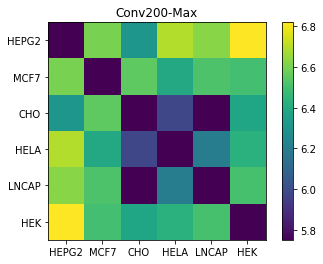

In [109]:
fig, ax = plt.subplots()
plt.imshow(d, vmin=np.min(d[d>0]), vmax=np.max(d))
ax.set_xticks(range(6))
ax.set_yticks(range(6))
ax.set_xticklabels(cell_types)
ax.set_yticklabels(cell_types)
plt.title('Conv200-Max')
plt.colorbar()

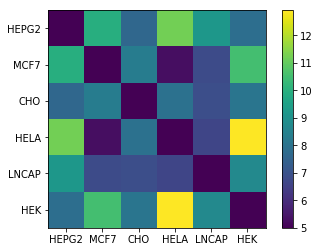

In [91]:
fig, ax = plt.subplots()
plt.imshow(d2)
ax.set_xticks(range(6))
ax.set_yticks(range(6))
ax.set_xticklabels(cell_types)
ax.set_yticklabels(cell_types)
plt.colorbar()

In [92]:
# motif comparisons across all motifs
matches3 = {}
for c1 in cell_types:
    for c2 in cell_types:
        if c1!=c2:
            matches3[c1,c2] = draw_logo.motif_set_matches(motifs2[c1], motifs2[c2])

In [93]:
distances3 = {}
for c1 in cell_types:
    for c2 in cell_types:
        if c1!=c2:
            match = matches3[c1,c2]
            print c1, c2, np.mean([m[2] for m in match])
            distances3[c1, c2] = np.mean([m[2] for m in match])

HEPG2 MCF7 2.24875211941
HEPG2 CHO 2.71026805844
HEPG2 HELA 2.19115535596
HEPG2 LNCAP 2.37224927954
HEPG2 HEK 2.18182223853
MCF7 HEPG2 2.47745742862
MCF7 CHO 2.67045719888
MCF7 HELA 2.26415544493
MCF7 LNCAP 2.44270053584
MCF7 HEK 2.3618935032
CHO HEPG2 2.24465880166
CHO MCF7 2.05262164091
CHO HELA 1.86873144278
CHO LNCAP 1.76157910746
CHO HEK 1.99354599475
HELA HEPG2 2.19200420721
HELA MCF7 2.10960924734
HELA CHO 2.21467060251
HELA LNCAP 2.10971326541
HELA HEK 1.84727140521
LNCAP HEPG2 2.26466156724
LNCAP MCF7 2.08923721373
LNCAP CHO 2.04611604184
LNCAP HELA 1.91746336738
LNCAP HEK 1.98276458356
HEK HEPG2 2.26328280088
HEK MCF7 2.25845232986
HEK CHO 2.61142336924
HEK HELA 2.11209243595
HEK LNCAP 2.24360127665


In [110]:
d = np.zeros((6,6))
for i,c1 in enumerate(cell_types):
    for j,c2 in enumerate(cell_types):
        if c1==c2:
            d[i,j] = 0.0
        else:
            d[i,j] = distances3[c1, c2] + distances3[c2, c1]


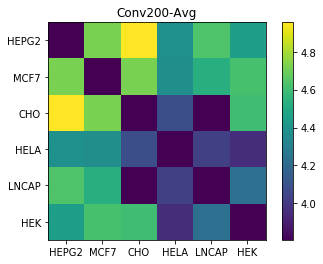

In [111]:
fig, ax = plt.subplots()
plt.imshow(d, vmin=np.min(d[d>0]), vmax=np.max(d))
ax.set_xticks(range(6))
ax.set_yticks(range(6))
ax.set_xticklabels(cell_types)
ax.set_yticklabels(cell_types)
plt.title('Conv200-Avg')
plt.colorbar()

## comparisons between avg & max

In [114]:
matches4 = {}
for c in cell_types:
    matches4[c] = draw_logo.motif_set_matches(motifs[c], motifs2[c])

In [116]:
distances = {}
for c in cell_types:
    distances[c] = np.mean([m[2] for m in matches4[c]])

In [117]:
distances

{'CHO': 6.04682999599925,
 'HEK': 5.919215693266449,
 'HELA': 6.2025198243756128,
 'HEPG2': 5.6960546686658109,
 'LNCAP': 5.5837249142328131,
 'MCF7': 5.7840899893741149}